<a href="https://colab.research.google.com/github/Fatehbs/AI-applications/blob/main/Kalman_Filter_of_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

In [ ]:
sigma_x = 0.003
sigma_m = 0.005

In [ ]:
TICKER = "INFY"

In [ ]:
nifty = yf.Ticker(TICKER)

In [ ]:
data_df = nifty.history(period = '1y')

In [ ]:
S0 = data_df['Close'][0]

In [ ]:
calc_df = pd.DataFrame({
    'S' : data_df['Close']
})

In [ ]:
calc_df.eval('log_S = log(S)', inplace = True)

In [ ]:
calc_df['prev_log_S'] = calc_df['log_S'].shift(1)

In [ ]:
calc_df = calc_df.dropna()

In [ ]:
calc_df.eval('r = log_S - prev_log_S', inplace = True)

In [ ]:
calc_df

,S,log_S,prev_log_S,r
Date,,,,
2023-05-16 00:00:00-04:00,14.716437,2.688965,2.704072,-0.015107
2023-05-17 00:00:00-04:00,14.794353,2.694246,2.688965,0.005280
2023-05-18 00:00:00-04:00,14.755395,2.691609,2.694246,-0.002637
2023-05-19 00:00:00-04:00,14.852791,2.698188,2.691609,0.006579
2023-05-22 00:00:00-04:00,15.242372,2.724079,2.698188,0.025891
...,...,...,...,...
2024-05-08 00:00:00-04:00,17.090000,2.838494,2.840831,-0.002338
2024-05-09 00:00:00-04:00,16.969999,2.831447,2.838494,-0.007046
2024-05-10 00:00:00-04:00,16.870001,2.825537,2.831447,-0.005910


In [ ]:
prev_x = 0
prev_sx = 0

data_list = [[S0, 0, 0, 0]]

for idx, (S, r) in calc_df[['S', 'r']].iterrows():
    pred_x = prev_x
    pred_sx = prev_sx + sigma_x ** 2
    pred_sigma_x = np.sqrt(pred_sx)
    K = pred_sx / (pred_sx + sigma_m **2)
    x = pred_x + K * (r - pred_x)
    sx = (1 - K) * pred_sx
    prev_x = x
    prev_sx = sx
    data_list += [[S, r, pred_x, pred_sigma_x]]

In [ ]:
filtered_df = pd.DataFrame(data_list, columns = ['S', 'r', 'x', 'sigma_x'])

In [ ]:
filtered_df.eval('ux = x + 3 * sigma_x', inplace = True)
filtered_df.eval('lx = x - 3 * sigma_x', inplace = True)

In [ ]:
filtered_df['prev_S'] = filtered_df['S'].shift(1)

In [ ]:
filtered_df.dropna(inplace = True)

In [ ]:
filtered_df.eval('pred_S = prev_S * exp(x)', inplace = True)
filtered_df.eval('pred_lS = prev_S * exp(lx)', inplace = True)
filtered_df.eval('pred_uS = prev_S * exp(ux)', inplace = True)

In [ ]:
filtered_df.reset_index(inplace = True)

<Axes: xlabel='index', ylabel='S'>

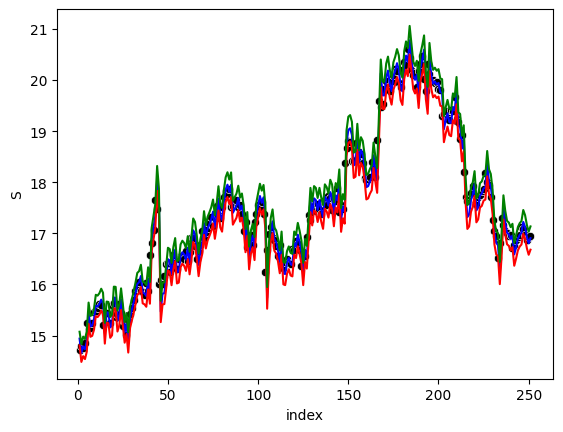

In [ ]:
sns.scatterplot(x = 'index', y = 'S', data = filtered_df, color = 'black')
sns.lineplot(x = 'index', y = 'pred_S', data = filtered_df, color = 'blue')
sns.lineplot(x = 'index', y = 'pred_lS', data = filtered_df, color = 'red')
sns.lineplot(x = 'index', y = 'pred_uS', data = filtered_df, color = 'green')